Sun (single rotating star)
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.3 installed (uncomment this line if running in an online notebook session such as colab).

In [1]:
#!pip install -I "phoebe>=2.3,<2.4"

As always, let's do imports and initialize a logger and a new bundle.

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_star(starA='sun')

Setting Parameters
-----------------------

In [3]:
print(b['sun'])

ParameterSet: 28 parameters
             requiv@sun@component: 1.0 solRad
C        requiv_max@sun@component: 3.4292622920441116 solRad
               teff@sun@component: 6000.0 K
               abun@sun@component: 0.0
C              logg@sun@component: 4.438067632266453
             period@sun@component: 1.0 d
C              freq@sun@component: 6.283185 rad / d
               incl@sun@component: 90.0 deg
            long_an@sun@component: 0.0 deg
          gravb_bol@sun@component: 0.32
   irrad_frac_refl_bol@sun@com...: 0.6
C  irrad_frac_lost_bol@sun@com...: 0.4
        ld_mode_bol@sun@component: lookup
        ld_func_bol@sun@component: logarithmic
   ld_coeffs_source_bol@sun@co...: auto
               mass@sun@component: 1.0 solMass
                  freq@constraint: 6.283185 / {period@sun@component}
                  logg@constraint: log10((({mass@sun@component} / ({requiv@sun@component} ** 2.000000)) * 2942.206218) * 9.319541)
   irrad_frac_lost_bol@constraint: 1.000000 - {irrad_fr

Let's set all the values of the sun based on the nominal solar values provided in the units package.

In [4]:
b.set_value('teff', 1.0*u.solTeff)
b.set_value('requiv', 1.0*u.solRad)
b.set_value('mass', 1.0*u.solMass)
b.set_value('period', 24.47*u.d)

And so that we can compare with measured/expected values, we'll observe the sun from the earth - with an inclination of 23.5 degrees and at a distance of 1 AU.

In [5]:
b.set_value('incl', 23.5*u.deg)
b.set_value('distance', 1.0*u.AU)

Checking on the set values, we can see the values were converted correctly to PHOEBE's internal units.

In [6]:
print(b.get_quantity('teff'))
print(b.get_quantity('requiv'))
print(b.get_quantity('mass'))
print(b.get_quantity('period'))
print(b.get_quantity('incl'))
print(b.get_quantity('distance'))

5772.0 K
1.0 solRad
1.0 solMass
24.47 d
23.5 deg
149597870700.0 m


Running Compute
--------------------

Let's add a light curve so that we can compute the flux at a single time and compare it to the expected value.  We'll set the passband luminosity to be the nominal value for the sun. We'll also add a mesh dataset so that we can plot the temperature distributions and test the size of the sun verse known values.

In [7]:
b.add_dataset('lc', times=[0.], pblum=1*u.solLum)
b.add_dataset('mesh', compute_times=[0.], columns=['teffs', 'loggs', 'rs'])

<ParameterSet: 85 parameters | contexts: dataset, figure, compute, constraint>

In [8]:
b.run_compute(irrad_method='none', distortion_method='rotstar')

100%|██████████| 1/1 [00:00<00:00, 126.61it/s]


<ParameterSet: 11 parameters | kinds: lc, mesh>

Comparing to Expected Values
--------------------------------

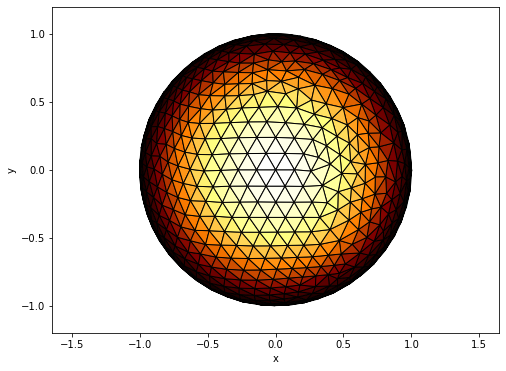

In [9]:
afig, mplfig = b['mesh'].plot(fc='teffs', x='xs', y='ys', show=True)

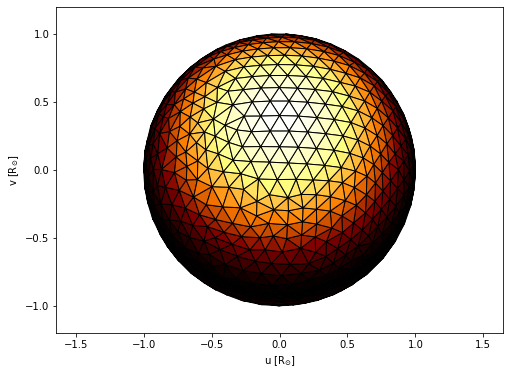

In [10]:
afig, mplfig = b['mesh'].plot(fc='teffs', x='us', y='vs', show=True)

In [11]:
print("teff: {} ({})".format(b.get_value('teffs').mean(), 
                             b.get_value('teff', context='component')))

teff: 5771.999931372561 (5772.0)


For a rotating sphere, the minimum radius should occur at the pole and the maximum should occur at the equator.

In [12]:
print("rmin (pole): {} ({})".format(b.get_value('rs').min(), 
                             b.get_value('requiv', context='component')))

rmin (pole): 0.9999925934972649 (1.0)


In [13]:
print("rmax (equator): {} (>{})".format(b.get_value('rs').max(), 
                              b.get_value('requiv', context='component')))

rmax (equator): 1.0000037175283814 (>1.0)


In [14]:
print("logg: {}".format(b.get_value('loggs').mean()))

logg: 4.4380610750259155


In [15]:
print("flux: {}".format(b.get_quantity('fluxes@model')[0]))

flux: 1358.2857979350558 W / m2
